<a href="https://colab.research.google.com/github/jmoralespineda/TAM_TEORIA_APRENDIZAJE_DE_MAQUINA/blob/main/TAREA/TAREA7_ConglomeradosNosupervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje no supervisado

## Conglomerados (Clustering)

- Se presentan los conceptos b√°sicos de aprendizaje no supervisado mediante nociones de disimilitud y similitud.

**Ejemplo:** Consideremos el conjunto de datos *iris dataset*, donde la especie de cada instancia (es decir, su clase) se representa con un marcador diferente:

In [33]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

data = load_iris()
X    = data.data
y    = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

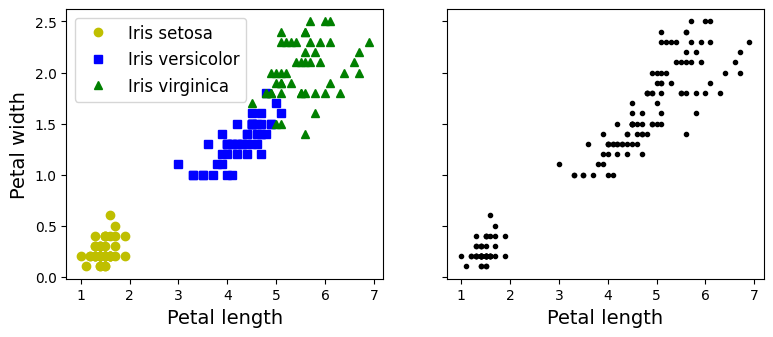

In [34]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

#save_fig("classification_vs_clustering_plot")
plt.show()

- **Figura de la izquierda:** Es un conjunto de datos etiquetado, para el cual los algoritmos de clasificaci√≥n como Regresi√≥n log√≠stica, SVM o clasificadores de bosque aleatorio son muy adecuados.
- **Figura de la derecha:** Tenemos el mismo conjunto de datos, pero sin las etiquetas, por lo que ya no puede usar un algoritmo de clasificaci√≥n.

- Los algoritmos de conglomerados (clustering) buscan extraer grupos homogeneos de datos usando solo las caracter√≠sticas de entrada.

- **NOTA:** No existe una definici√≥n universal de lo que es un *cl√∫ster*: depende del contexto, diferentes algoritmos capturar√°n diferentes tipos de cl√∫steres.

- Algunos algoritmos buscan instancias centradas alrededor de un punto particular, llamado *centroide*. Otros buscan *regiones continuas de instancias densamente empaquetadas*: estos grupos pueden tomar cualquier forma.

## K-means

Dado un conjunto de datos no supervisado:
\begin{equation}
X = \{ \mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n \}, \quad \mathbf{x}_i \in \mathbb{R}^P
\end{equation}

El problema de optimizaci√≥n del algoritmo K-means, para agrupar los datos de entrada en $K$ grupos disjuntos, se puede definir como:

\begin{align}
\hat{\boldsymbol{\mu}}_k =& \arg\min_{\boldsymbol{\mu}_k} \sum_{k=1}^{K} \sum_{\mathbf{x} \in C_k} \|\mathbf{x} - \boldsymbol{\mu}_k\|^2\\
\text{s.t.} & \quad C_k = \left\{\mathbf{x}_n : k=\min_{j}\|\mathbf{x} - \boldsymbol{\mu}_k\|\right\} \\
& \quad C_k \cap C_{k'} = \emptyset
\end{align}

donde el centro se define como:

\begin{equation}
\boldsymbol{\mu}_k = \frac{1}{|C_k|} \sum_{\mathbf{x} \in C_k} \mathbf{x}
\end{equation}

Y la actualizaci√≥n de los mismos depende de:

\begin{equation}
\boldsymbol{\mu}_k^{(t+1)} = \frac{1}{|C_k^{(t)}|} \sum_{\mathbf{x} \in C_k^{(t)}} \mathbf{x}
\end{equation}

**Ejemplo:** Consideremos un conjunto de datos sin etiqueta representado por $5$ *blobs* de instancias/muestras.

In [35]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.6,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  2],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y     = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)


X_ = X

Ahora observemos los *blobs*:

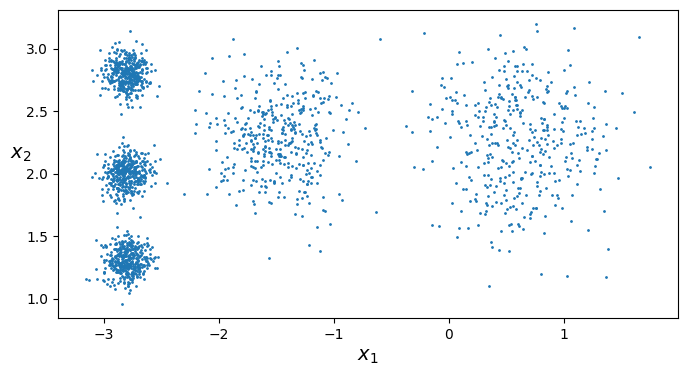

In [36]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
#save_fig("blobs_plot")
plt.show()

### Ajuste y predicci√≥n

- Vamos a entrenar un *clustering K-Means* en este conjunto de datos.

- **Intentaremos encontrar el centro de cada *blob* y asignar cada instancia al *blob* m√°s cercano**:

In [37]:
from sklearn.cluster import KMeans
k      = 5
kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
y_pred = kmeans.fit_predict(X)

- Tengamos en cuenta que debemos especificar el n√∫mero de cl√∫steres $k$ que debe encontrar el algoritmo.

- En este caso, cada instancia fue asignada a uno de los 5 grupos.

- En el contexto de la agrupaci√≥n, **la etiqueta de una instancia es el √≠ndice de la agrupaci√≥n a la que el algoritmo asigna esta instancia**.

- No debe confundirse con las etiquetas de clase en clasificaci√≥n.

- *KMeans* conserva una copia de las etiquetas de las instancias en las que se entren√≥, disponible a trav√©s de la variable *labels_ instance*:

In [38]:
y_pred

array([1, 1, 4, ..., 3, 4, 1], dtype=int32)

In [39]:
y_pred is kmeans.labels_

True

Tambi√©n podemos echar un vistazo a los 5 centroides que encontr√≥ el algoritmo:

In [40]:
kmeans.cluster_centers_

array([[ 0.34187422,  2.22617479],
       [-2.80236767,  1.6483813 ],
       [-1.4714462 ,  2.28524725],
       [-2.79255053,  2.79105781],
       [ 0.95102961,  2.29714359]])

Por supuesto, podemos asignar f√°cilmente nuevas instancias al cl√∫ster cuyo centroide es el m√°s cercano:

In [41]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 4, 3, 3], dtype=int32)

### Fronteras de decisi√≥n

Tracemos los **l√≠mites de decisi√≥n del modelo**. Esto nos da un *diagrama de Voronoi*:

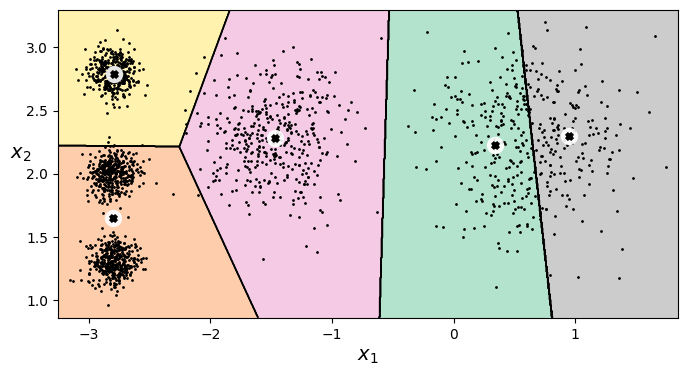

In [42]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=20, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=20, linewidths=3,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
#save_fig("voronoi_plot")
plt.show()

- La gran mayor√≠a de las instancias estan claramente asignadas al grupo apropiado,**pero algunas instancias probablemente estaban mal etiquetadas** (especialmente cerca del l√≠mite entre el grupo superior izquierdo y el grupo central).
- De hecho, el algoritmo **K-Means no se comporta muy bien cuando los *blobs* tienen di√°metros muy diferentes**, ya que lo √∫nico que le importa al asignar una instancia a un cl√∫ster es la distancia al centro.

### Hard Clustering vs Soft Clustering

- En lugar de asignar cada instancia a un solo cl√∫ster, lo que se denomina *hard clustering*, puede ser √∫til **asignar a cada instancia una puntuaci√≥n por agrupaci√≥n**: esto se denomina *soft clustering*.

- **Ejemplo:** el puntaje puede ser la distancia entre la instancia y el centroide o, por el contrario, puede ser un puntaje de similitud (o afinidad) como la Funci√≥n de Base Radial Gaussiana. En la clase *KMeans*, el m√©todo *transform()* mide la distancia desde cada instancia a cada centroide:

In [43]:
kmeans.transform(X_new)

array([[0.40991831, 2.82434068, 1.49883952, 2.9024319 , 0.99636922],
       [2.66773081, 5.81301181, 4.48053536, 5.84631629, 2.0704043 ],
       [3.43029572, 1.36599108, 1.68740873, 0.29443525, 4.01305895],
       [3.35307375, 0.87424993, 1.54356583, 0.35742123, 3.95623378]])

### K-Means

**El algoritmo en acci√≥n:**

- La clase *KMeans* aplica un algoritmo optimizado por defecto. Para obtener el algoritmo K-Means original (solo con fines educativos), debe establecer *init="random"*, *n_init = 1* and *algorithm="full"*. Estos hiperpar√°metros se explicar√°n a continuaci√≥n.

- Ejecutemos el algoritmo K-Means para 1, 2 y 3 iteraciones, para ver **c√≥mo se mueven los centroides**:

In [44]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=5, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=10, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=10, n_clusters=5, n_init=1, random_state=1)

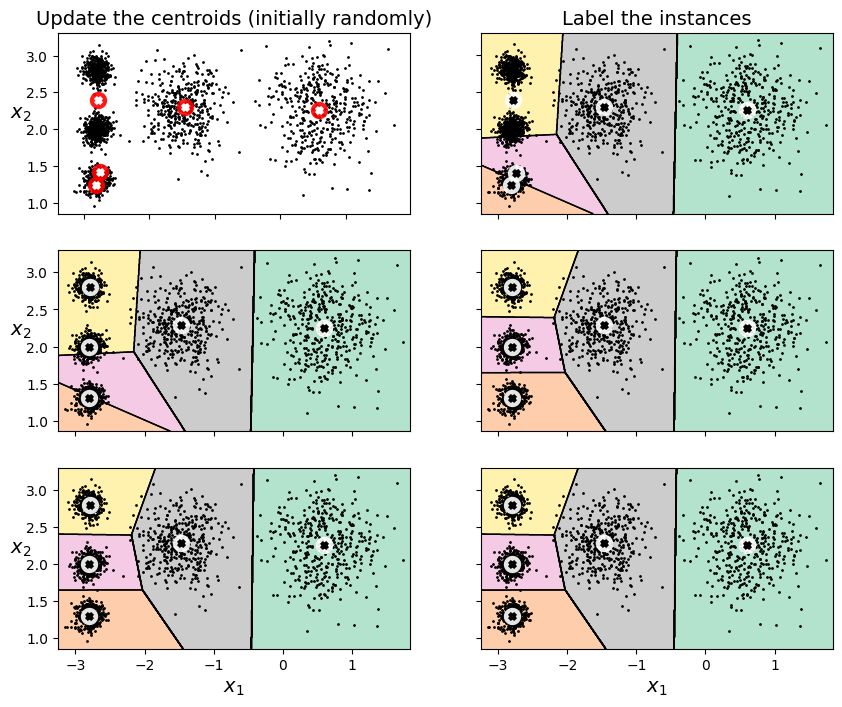

In [45]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

#save_fig("kmeans_algorithm_plot")
plt.show()

- Podemos ver el algoritmo en acci√≥n en la Figura anterior, los centroides se inicializan aleatoriamente (arriba a la izquierda).
- Luego las instancias se etiquetan (arriba a la derecha).
- Luego los centroides se actualizan (centro a la izquierda).
- Seguido, las instancias se vuelven a etiquetar (centro a la derecha ), y as√≠.

- **NOTA:** La complejidad computacional del algoritmo es generalmente lineal con respecto al n√∫mero de instancias, el n√∫mero de cl√∫steres $k$ y el n√∫mero de dimensiones.

- Sin embargo, esto solo es cierto cuando los datos tienen una estructura de agrupamiento. Si no es as√≠, entonces, en el peor de los casos, la complejidad puede aumentar exponencialmente con el n√∫mero de instancias.

### Variabilidad en K-Means

**Ejemplo:** la siguiente Figura muestra dos soluciones sub√≥ptimas con las que el algoritmo puede converger si no tiene suerte con el paso de inicializaci√≥n aleatoria:

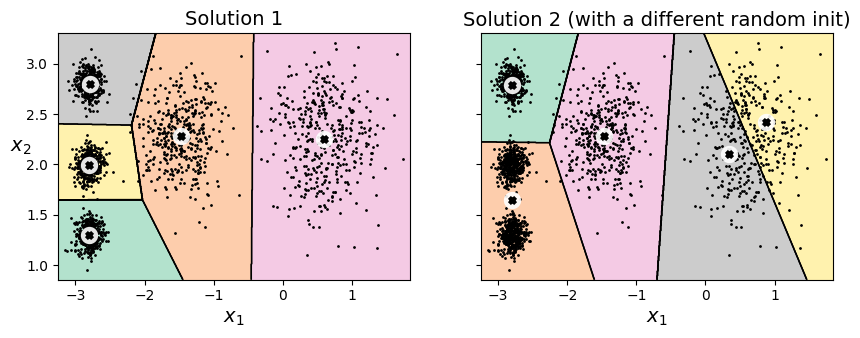

In [46]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         random_state=110)
kmeans_rnd_init2 = KMeans(n_clusters=5, init=np.array([[-3,2.7],[-2.9,2.5],[-1,0.5],[-0.9,0.3],[0.5,0.5]]), n_init=1,
                          random_state=190)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

#save_fig("kmeans_variability_plot")
plt.show()

### M√©todos de inicializaci√≥n de centroides

Si sabemos aproximadamente d√≥nde deber√≠an estar los centroides (por ejemplo, si ejecut√≥ otro algoritmo de agrupaci√≥n anteriormente), puede establecer el hiperpar√°metro *init* en una matriz NumPy que contiene la lista de centroides y establecer *n_init* en 1:

In [47]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans    = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

- Otra soluci√≥n es **ejecutar el algoritmo varias veces con diferentes inicializaciones aleatorias y retonar la mejor soluci√≥n**.

- Esto se controla mediante el hiperpar√°metro *n_init*: de forma predeterminada, es igual a 10, lo que significa que todo el algoritmo descrito anteriormente se ejecuta 10 veces cuando se llama al m√©todo *fit()*, y Scikit-Learn mantiene la mejor soluci√≥n.

- Pero, **¬øc√≥mo sabe exactamente cu√°l soluci√≥n es la mejor?**

- K-means utiliza una m√©trica de rendimiento llamada *inercia del modelo*: distancia cuadr√°tica media entre cada instancia y su centroide m√°s cercano.

In [48]:
kmeans.inertia_

213.85700616373146

- El m√©todo *score()* devuelve la inercia negativa. ¬øPor qu√© negativo? **porque el m√©todo *score()* de un predictor siempre debe respetar la regla, a mayor valor mejor**.

In [49]:
kmeans.score(X)

-213.85700616373148

### M√∫ltiples inicializaciones

- Un enfoque para resolver el problema de la variabilidad es **simplemente ejecutar el algoritmo K-Means varias veces con diferentes inicializaciones aleatorias y seleccionar la soluci√≥n que minimice la inercia**.

- **Ejemplo:** tenemos las inercias de los dos modelos *"malos"* que se muestran en la figura anterior:

In [50]:
kmeans_rnd_init1.inertia_

213.85458436211906

In [51]:
kmeans_rnd_init2.inertia_

272.8609528813104

- Cuando configuramos el hiperpar√°metro *n_init*, Scikit-Learn ejecuta el algoritmo original *n_init* veces y selecciona la soluci√≥n que minimiza la inercia. Por defecto, Scikit-Learn establece *n_init = 10*.

In [52]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                               random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=11)

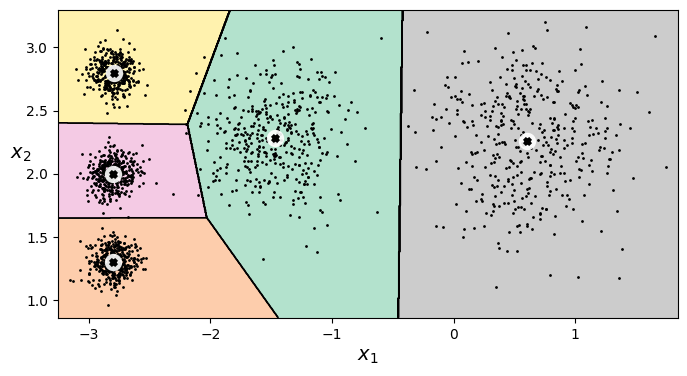

In [53]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

### K-Means++

- Para establecer la inicializaci√≥n en K-Means ++, simplemente se configura *init="k-means ++"* (esto es realmente el valor predeterminado):

- K-means ++ genera centros lejanos entre si para abarcar mejor el espacio de b√∫squeda.

In [54]:
KMeans()

KMeans()

### Accelerated K-Means

- Para usar la variante K-Means de **Elkan**, simplemente configure *algorithm = "elkan"*.

- Tenga en cuenta que no admite datos dispersos, por lo que, de forma predeterminada, Scikit-Learn usa "*elkan*" para datos densos y "*full*" (el algoritmo K-Means normal) para datos ralos.

- ElKan aprovecha la desigualdad triangular para estimar de forma eficiente las distancias entre puntos.

In [55]:
%timeit -n 20 KMeans(algorithm="elkan",n_init='auto').fit(X)

6.58 ms ¬± 377 ¬µs per loop (mean ¬± std. dev. of 7 runs, 20 loops each)


In [56]:
%timeit -n 20 KMeans(n_init='auto').fit(X)

3.93 ms ¬± 234 ¬µs per loop (mean ¬± std. dev. of 7 runs, 20 loops each)


### Mini-Batch K-Means

- Implementaci√≥n de K-means por lotes.

- Actualiza los centros sobre subconjuntos aleatorios de puntos, favoreciendo el costo computacional.


In [57]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42,n_init='auto')
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [58]:
minibatch_kmeans.inertia_

313.93439856837193

- Si el conjunto de datos no cabe en la memor√≠a RAM, la opci√≥n m√°s simple es usar la clase *memmap*.

- **Ejemplo:** Primero carguemos la base de datos de d√≠gitos escritos a mano MNIST:

In [59]:
import os
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist #cargar fashion mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1)/255.
X_test  = X_test.reshape(X_test.shape[0], -1)/255.

- A continuaci√≥n, escrib√°moslo en un *memmap*:

In [60]:
from tempfile import mkdtemp
import os.path as path
filename = path.join(mkdtemp(), 'my_mnist.data')
X_mm     = np.memmap(filename, dtype='float32', mode='w+', shape=X_train.shape)
X_mm[:]  = X_train

# Flush changes to disk -> actualizar en disco
X_mm.flush()

del X_mm

- Ahora cargamos y entrenamos desde el memmap:

In [61]:
X_mm = np.memmap(filename, dtype='float32', mode='r', shape=X_train.shape)
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42,n_init='auto')
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

- Si nuestros datos son tan grandes que no puede usar *memmap*, las cosas se vuelven m√°s complicadas.

- Comencemos escribiendo una funci√≥n para cargar el pr√≥ximo lote :

In [62]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

- Ahora podemos entrenar al modelo al alimentarlo un batch a la vez.

- Tambi√©n necesitamos implementar m√∫ltiples inicializaciones y mantener el modelo con la menor inercia:

In [63]:
np.random.seed(42)

X = X_train

k            = 5
n_init       = 10
n_iterations = 100
batch_size   = 100
init_size    = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size,n_init='auto')
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

best_kmeans.score(X)

-2357706.880524697

**Mini-batch K-Means es mucho m√°s r√°pido que los K-Means normales**:

In [64]:
%timeit KMeans(n_clusters=5,n_init='auto').fit(X)

6.05 s ¬± 2.51 s per loop (mean ¬± std. dev. of 7 runs, 1 loop each)


In [65]:
%timeit MiniBatchKMeans(n_clusters=5,n_init='auto').fit(X)

542 ms ¬± 152 ms per loop (mean ¬± std. dev. of 7 runs, 1 loop each)


- **¬°Eso es mucho m√°s r√°pido!** Sin embargo, su rendimiento es a menudo m√°s bajo (mayor inercia), y se sigue degradando a medida que aumenta $k$.


# C√≥mo encontrar el n√∫mero de grupos?

- **Ejemplo:** como podemos ver a continuaci√≥n, establecer $k$ en 3 o 8 da como resultado modelos bastante malos:

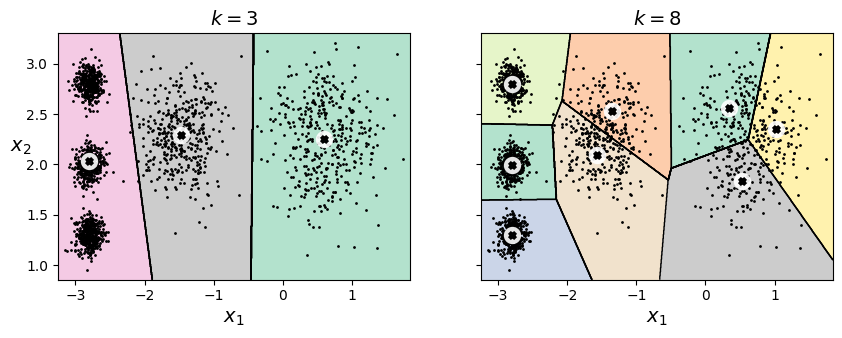

In [66]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

X = X_ #gaussians

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
#save_fig("bad_n_clusters_plot")
plt.show()

- **TIP:** Quiz√°s estemos pensando que podr√≠amos **elegir el modelo con la menor inercia**.

- **Respuesta:** Lamentablemente, no es tan simple. La inercia no es una buena medida de rendimiento cuando se trata de elegir $k$, ya que sigue disminuyendo a medida que aumentamos $k$. De hecho, cuantos m√°s grupos haya, m√°s cerca estar√° cada instancia de su centroide m√°s cercano.

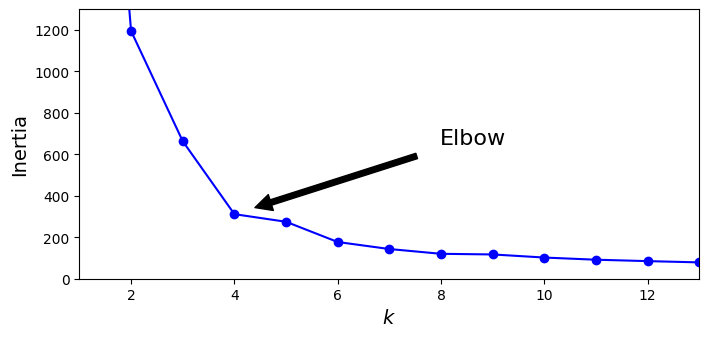

In [67]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42,n_init='auto').fit(X)
                for k in range(1, 14)]
inertias     = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 14), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 13, 0, 1300])
#save_fig("inertia_vs_k_plot")
plt.show()

- Como podemos ver, la inercia cae muy r√°pidamente a medida que aumentamos $k$ hasta 4, pero luego disminuye mucho m√°s lentamente a medida que seguimos aumentando $k$.
- Esta curva tiene aproximadamente la forma de un brazo, y hay un "*codo*" en $k = 4$, por lo que si no lo supi√©ramos mejor, ser√≠a una buena opci√≥n: cualquier valor m√°s bajo ser√≠a dram√°tico, mientras que cualquier valor m√°s alto no ayudar√≠a mucho.

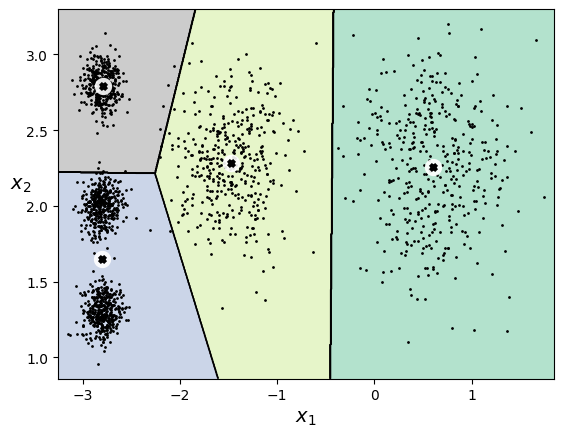

In [68]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

### Silueta

- Una altenativata a la inercia, es el *silhouette score*, como versi√≥n normalizada por grupo del concepto de inercia:


\begin{equation}
s_n = \frac{b_n - a_n}{\max(a_n, b_n)}
\end{equation}

\begin{equation}
S = \frac{1}{N} \sum_{n=1}^{N} s_n
\end{equation}


- $a_n:$ distancia promedio desde la muestra n a todos los puntos en el mismo cluster.

- $b_n:$ distancia m√≠nima desde la muestra n a todos los puntos en el cluster m√°s cercano.

- Puede usar la funci√≥n *silhouette_score()* de Scikit-Learn, d√°ndole todas las instancias en el conjunto de datos y las etiquetas que se les asignaron.


Tracemos la puntuaci√≥n de la silueta en funci√≥n de $k$:

In [69]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

np.float64(0.7000294635075308)

Comparemos los puntajes de silueta para diferentes n√∫meros de grupos:

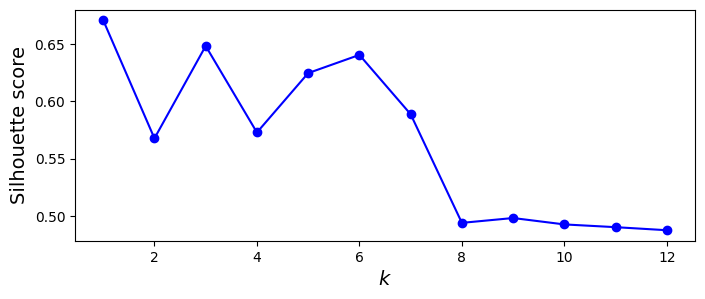

In [70]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 13), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
#save_fig("silhouette_score_vs_k_plot")
plt.show()

- Como podemos ver, aunque **confirma que $k = 4$ es una muy buena opci√≥n**.

Adicionalmente, obtenemos una visualizaci√≥n a√∫n m√°s informativa cuando trazamos el *silhouette score* de cada instancia, ordenado por el grupo al que est√°n asignados y por el valor del coeficiente (**diagrama de silueta**):

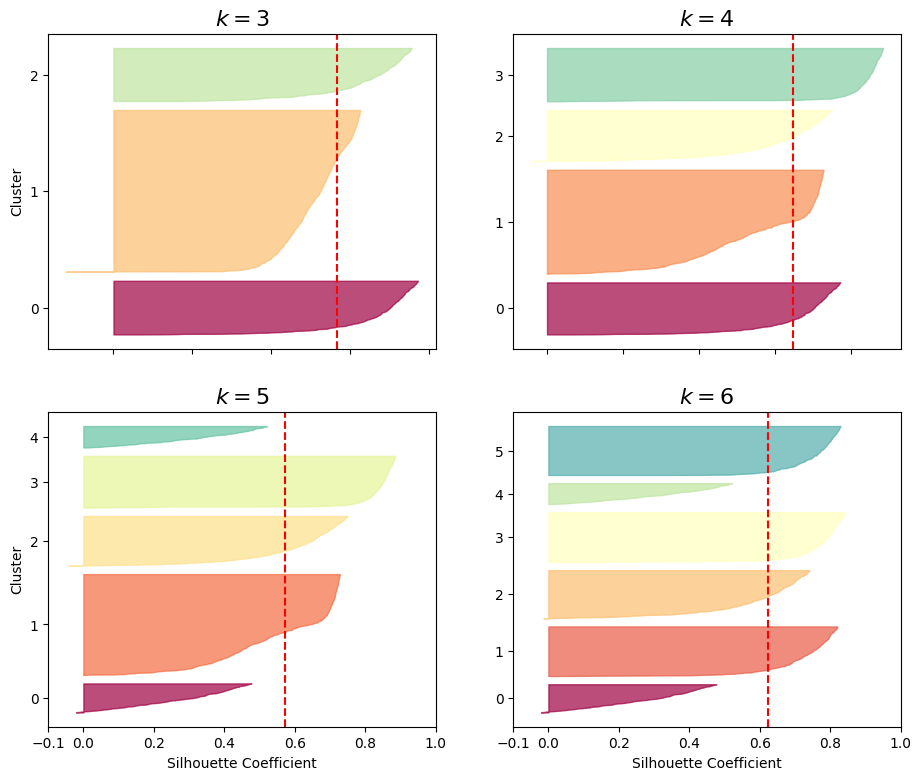

In [71]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred                  = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos     = padding
    ticks   = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

#save_fig("silhouette_analysis_plot")
plt.show()

- Las l√≠neas discontinuas verticales representan el *silhouette score* por grupo.
- Cuando la mayor√≠a de las instancias en un grupo tienen un coeficiente m√°s bajo que este puntaje (es decir, si muchas de las instancias se detienen cerca de la l√≠nea punteada, terminando a la izquierda de la misma), entonces **el grupo es bastante malo, sus instancias est√°n demasiado cerca de otros grupos**.


### Consideraciones sobre K-Means

**Ejemplo:** la Figura a continuaci√≥n muestra c√≥mo KMeans agrupa un conjunto de datos que contiene tres grupos elipsoidales de diferentes dimensiones, densidades y orientaciones:

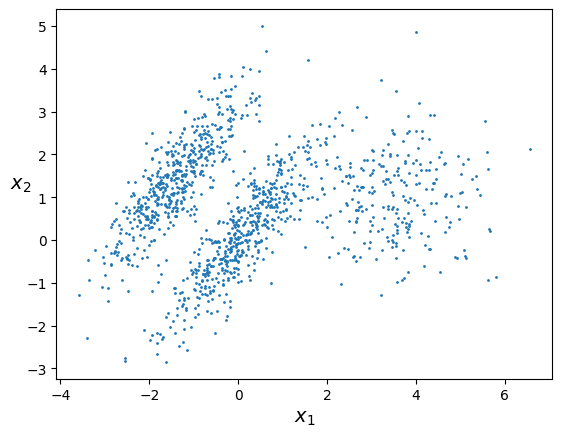

In [72]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1     = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2     = X2 + [6, -8]
X      = np.r_[X1, X2]
y      = np.r_[y1, y2]

plot_clusters(X)

In [73]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad  = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

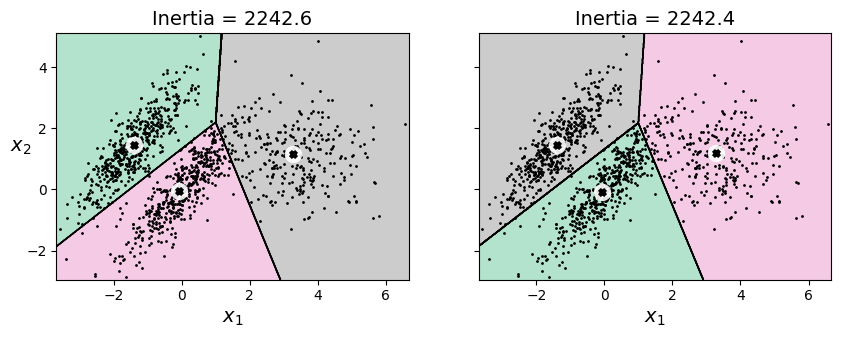

In [74]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

#save_fig("bad_kmeans_plot")
plt.show()

Como podemos ver, **ninguna de estas soluciones es buena**.

- La soluci√≥n a la izquierda es mejor, pero a√∫n corta el $25\%$ del grupo intermedio y lo asigna al grupo a la derecha.
- La soluci√≥n a la derecha es simplemente terrible, a pesar de que su inercia es menor.

Entonces, dependiendo de los datos, los diferentes algoritmos de agrupaci√≥n pueden funcionar mejor. Por ejemplo, en estos tipos de grupos el√≠pticos, los **modelos de mezcla gaussiana** funcionan muy bien.

**TIP:** Es importante **escalar las caracter√≠sticas de entrada antes de ejecutar K-Means**, de lo contrario, los grupos pueden estar muy extendidos y K-Means funcionar√° mal. Escalar las caracter√≠sticas no garantiza que todos los cl√∫steres sean agradables y esf√©ricos, pero generalmente mejora las cosas.

## DBSCAN

- Density-Based Spatial Clustering of Applications with Noise (DBSCAN) es un algoritmo de clustering que considera la densidad de puntos en una regi√≥n.

- Puede ser √∫til para estructuras no lineales y para la detecci√≥n de at√≠picos.

- Su funcionamiento se centra en la estimaci√≥n de vecindarios:


\begin{equation}
N_{\varepsilon}(p) = \{q \in D \mid \text{dist}(p, q) \leq \varepsilon\}
\end{equation}

- Y tiene en cuenta la restricci√≥n:

\begin{equation}
|N_{\varepsilon}(p)| \geq \text{minPts}
\end{equation}

- Un punto es considerado alcanzable (core-point), si:

\begin{equation}
q \in N_{\varepsilon}(p) \quad \text{and} \quad |N_{\varepsilon}(p)| \geq \text{minPts}
\end{equation}

In [75]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

In [76]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

Las etiquetas de todas las instancias ahora est√°n disponibles en la variable *labels_ instance*:

In [77]:
dbscan.labels_[:10]

array([-1, -1, -1, -1, -1, -1,  0, -1,  5, -1])

- Tenga en cuenta que algunas instancias tienen un √≠ndice de cl√∫ster igual a **-1**: esto significa que **el algoritmo las considera anomal√≠as**.

- Los √≠ndices de las instancias centrales est√°n disponibles en la variable de instancia *core_sample_indices_*, y las propias instancias centrales est√°n disponibles en la variable *components_ instance*:

In [78]:
len(dbscan.core_sample_indices_)

13

In [79]:
dbscan.core_sample_indices_

array([  6,  17,  34,  90, 128, 165, 179, 227, 234, 246, 247, 249, 276])

In [80]:
dbscan.components_[:3]

array([[ 0.4119847 , -0.28596972],
       [ 0.72038373, -0.41616684],
       [ 0.76244287, -0.39694127]])

In [81]:
import numpy as np
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [82]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [83]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

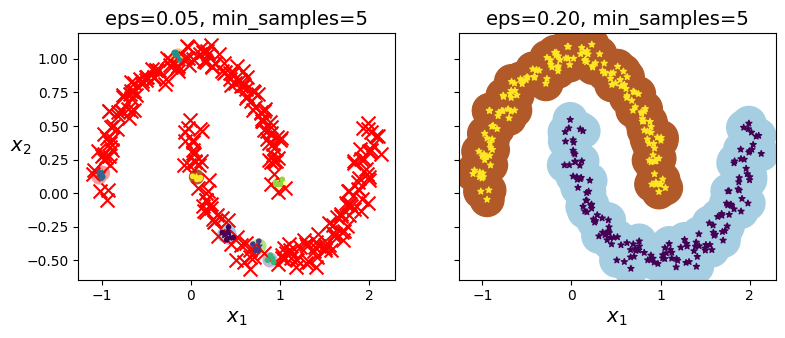

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

#save_fig("dbscan_plot")
plt.show()


- Como podemos ver, el algoritmo identific√≥ bastantes anomal√≠as, adem√°s de 7 grupos diferentes.

Afortunadamente, si **ampliamos el vecindario de cada instancia** al aumentar $\epsilon$ a 0.2, obtenemos el agrupamiento a la derecha, que se ve perfecto.

La clase **DBSCAN** no tiene un m√©todo *predict_()*, aunque tiene un m√©todo *fit_predict_()*. En otras palabras, no puede predecir a qu√© cl√∫ster pertenece una nueva instancia. La raz√≥n de esta decisi√≥n es que varios algoritmos de clasificaci√≥n podr√≠an tener sentido aqu√≠, y es bastante f√°cil entrenar uno, por ejemplo, un clasificador K-NN:

In [85]:
dbscan = dbscan2

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

- Ahora, dadas algunas instancias nuevas, **podemos predecir a qu√© grupo probablemente pertenecer√°n**, e incluso **estimar una probabilidad para cada grupo**.
- Tengamos en cuenta que solo los entrenamos en las instancias centrales, pero tambi√©n podr√≠amos haber optado por usar **todas las instancias**, o **todas menos las anomal√≠as**: esta elecci√≥n depende de la tarea final.

In [87]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 0, 0])

In [88]:
knn.predict_proba(X_new)

array([[0.4 , 0.6 ],
       [0.52, 0.48],
       [0.66, 0.34],
       [0.76, 0.24]])

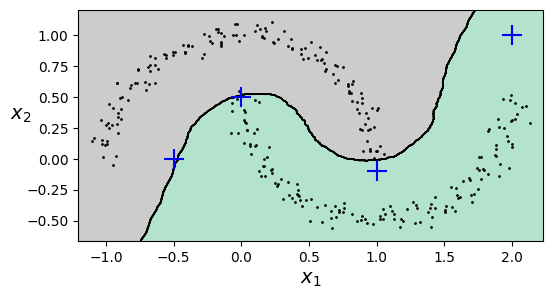

In [89]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
#save_fig("cluster_classification_plot")
plt.show()

El l√≠mite de decisi√≥n se representa en la Figura anterior:
- Las cruces representan las 4 instancias en *X_new*.
- Tengamos en cuenta que, dado que no hay ninguna anomal√≠a en el conjunto de entrenamiento del KNN, **el clasificador siempre elige un grupo, incluso cuando ese grupo est√° muy lejos**.

Sin embargo, es bastante sencillo introducir una *distancia m√°xima*, en cuyo caso **las dos instancias que est√°n lejos de ambos grupos se clasifican como anomal√≠as**. Para hacer esto, podemos usar el m√©todo de los *kneighbors()* del **KNeighsClassifier**: dado un conjunto de instancias, devuelve las distancias y los √≠ndices de los $k$ vecinos m√°s cercanos en el conjunto de entrenamiento (dos matrices, cada una con $k$ columnas):

In [90]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

### Spectral clustering

- Se basa en la similitud entre puntos (Gaussian kernel)

\begin{equation}
w_{nm} = \exp\left(-\frac{\|x_n - x_m\|^2}{2\sigma^2}\right)
\end{equation}

- Tiene en cuenta el grado de la matriz de similitud para ser robusta a datos at√≠picos:

\begin{equation}
d_{nn} = \sum_{m} w_{nm}
\end{equation}

- Posteriormente, se encuenta la matr√≠z Laplaciano:

\begin{equation}
L = D - W
\end{equation}

- Y se normaliza:

\begin{equation}
L_{sym} = D^{-\frac{1}{2}} L D^{-\frac{1}{2}} = I - D^{-\frac{1}{2}} W D^{-\frac{1}{2}}
\end{equation}

- Otra alternativa de normalizaci√≥n:

\begin{equation}
L_{rw} = D^{-1} L = I - D^{-1} W
\end{equation}

- Se descompone en valores y vectores propios:

\begin{equation}
L \mathbf{u} = \lambda \mathbf{u}
\end{equation}

- Finalmente se aplica un algoritmo tradicional de clustering, e.g., Kmeans, sobre los vectores propios escogidos.

In [91]:
from sklearn.cluster import SpectralClustering
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(gamma=100, n_clusters=2, random_state=42)

In [92]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [93]:
np.percentile(sc1.affinity_matrix_, 95) #puntos con similitud alta

np.float64(0.037950332908433894)

In [94]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

/tmp/ipython-input-3890908347.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)


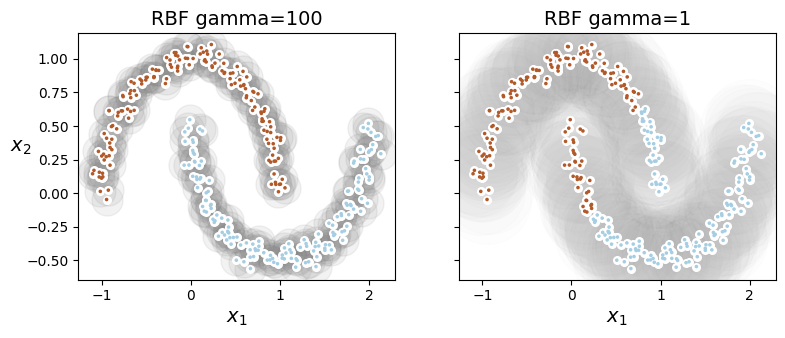

In [95]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

### Gr√°fico tipo grafo

- Grafiquemos un grafo sobre los datos a partir de la similitud calculada

In [96]:
!pip install networkx matplotlib

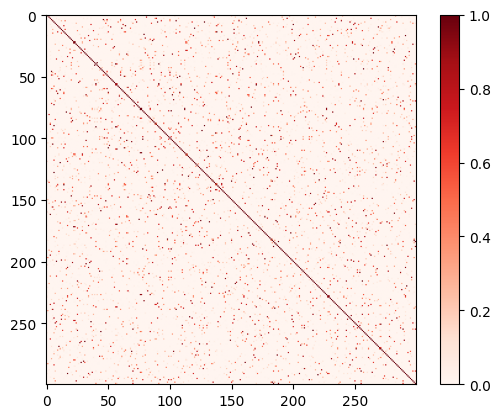

In [97]:
import networkx as nx
from scipy.spatial.distance import cdist, squareform
# Gaussian similarity

def gaussK(X,gamma=1):
  D = cdist(X,X)
  return np.exp(-gamma*D**2)

similarity_matrix = gaussK(X,gamma=100)
plt.imshow(similarity_matrix,cmap='Reds')
plt.colorbar()
plt.show()

In [98]:
# Create a graph from the similarity matrix using NetworkX

th_ = np.percentile(similarity_matrix, 90)

G = nx.Graph()

# Add nodes
for i in range(similarity_matrix.shape[0]):
    G.add_node(i)

# Add edges with weights
for i in range(similarity_matrix.shape[0]):
    for j in range(i + 1, similarity_matrix.shape[0]):
        if similarity_matrix[i, j] > th_:  # Optional: threshold to filter weak connections
            G.add_edge(i, j, weight=similarity_matrix[i, j])



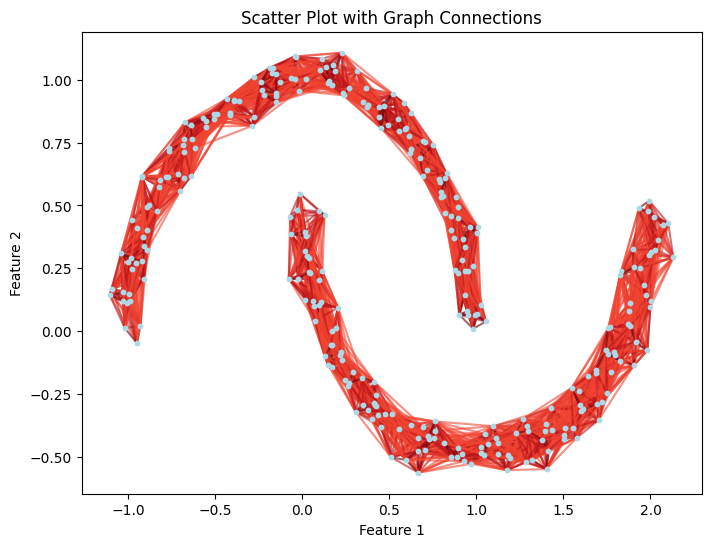

In [99]:
import matplotlib.cm as cm
plt.figure(figsize=(8, 6))

vq = np.percentile(similarity_matrix, [50,75,80,90,95,99])
colormap = plt.get_cmap('Reds',len(vq))
colors = colormap(np.linspace(0, 1, len(vq)))


# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c='lightblue', s=10, zorder=2)
# Plot the graph connections
for (i, j) in G.edges():
    plt.plot([X[i, 0], X[j, 0]], [X[i, 1], X[j, 1]],
             c=colors[np.argmin(cdist(similarity_matrix[i,j].reshape(-1,1),vq.reshape(-1,1)))], alpha=0.6, zorder=1)

plt.title('Scatter Plot with Graph Connections')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(0, 1))
#plt.colorbar(sm, label='Vector Value')
plt.show()

# Ejercicios

Para los siguientes puntos, utilizar la librer√≠a [RAPIDS](https://rapids.ai/) a la hora de implementar los algoritmos estudiados, en caso de estar disponibles.

- Realice una comparaci√≥n de los m√©todos de clustering vistos, para generar una segmentaci√≥n de imagen a color, incluyendo la informaci√≥n de ubicaci√≥n de cada pixel (ver Cuaderno gu√≠a [tanjiro](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/tanjiro.ipynb)). Varie la cantidad de grupos (niveles o clases de segmentaci√≥n) $k\in\{3,5,7,9\}$ y presente los scores de inercia y silueta conseguidos.

- Repita el punto anterior realizando una proyecci√≥n 2D de los datos con PCA y UMAP (ver gu√≠a [reducci√≥n de dimensi√≥n](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/8_ReduccionDimension.ipynb))
 antes de generar las segmentaciones.

In [100]:
#https://drive.google.com/file/d/1KENM6BW5UjRoSjnWmuBP_MS_NrC0cefP/view?usp=sharing

FILEID = "1KENM6BW5UjRoSjnWmuBP_MS_NrC0cefP"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O tanjiro.jpeg && rm -rf /tmp/cookies.txt

--2025-10-28 22:08:34--  https://docs.google.com/uc?export=download&confirm=&id=1KENM6BW5UjRoSjnWmuBP_MS_NrC0cefP
Resolving docs.google.com (docs.google.com)... 142.250.101.138, 142.250.101.102, 142.250.101.101, ...
Connecting to docs.google.com (docs.google.com)|142.250.101.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1KENM6BW5UjRoSjnWmuBP_MS_NrC0cefP&export=download [following]
--2025-10-28 22:08:34--  https://drive.usercontent.google.com/download?id=1KENM6BW5UjRoSjnWmuBP_MS_NrC0cefP&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6476 (6.3K) [image/jpeg]
Saving to: ‚Äòtanjiro.jpeg‚Äô

tanjiro.jpeg        100%[===================>]   6.32K  --.-KB/s    i

(125, 125, 3)

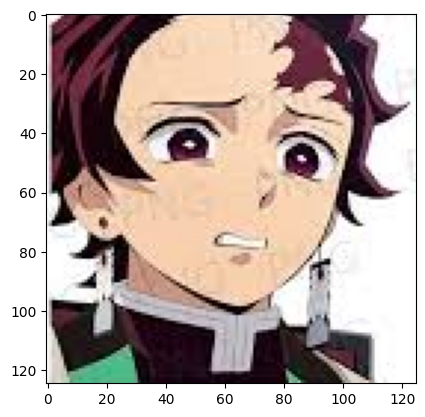

In [101]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
image = imread(os.path.join("tanjiro.jpeg"))
image = image[50:175,50:175,:]
plt.imshow(image)
image.shape

In [102]:
!pip install cudf-cu12 cuml-cu12 --extra-index-url=https://pypi.nvidia.com


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com


# Task 1
Realice una comparaci√≥n de los m√©todos de clustering vistos, para generar una segmentaci√≥n de imagen a color, incluyendo la informaci√≥n de ubicaci√≥n de cada pixel (ver Cuaderno gu√≠a tanjiro). Varie la cantidad de grupos (niveles o clases de segmentaci√≥n)  k‚àà{3,5,7,9}  y presente los scores de inercia y silueta conseguidos.

**CELDA 1 ‚Äî Importar librer√≠as y configurar entorno**

In [103]:
# =============================================================================
# CELDA 1: Importar librer√≠as y configurar entorno
# =============================================================================

# Librer√≠as generales
import numpy as np
import matplotlib.pyplot as plt
import os, time
from PIL import Image

# Librer√≠as de machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Intentamos importar RAPIDS (cuML) para usar GPU si est√° disponible
try:
    from cuml.cluster import KMeans as cuKMeans
    import cupy as cp
    use_rapids = True
    print("‚úÖ RAPIDS cuML detectado: se usar√° KMeans en GPU.")
except:
    from sklearn.cluster import MiniBatchKMeans
    use_rapids = False
    print("‚ö†Ô∏è RAPIDS no detectado: se usar√° MiniBatchKMeans de scikit-learn.")


‚úÖ RAPIDS cuML detectado: se usar√° KMeans en GPU.


**CELDA 2 ‚Äî Cargar imagen y preparar datos**

Esta celda carga una imagen (puede ser cualquier archivo .jpg o .png), la redimensiona si es muy grande, y genera un dataset con las caracter√≠sticas:
[R, G, B, x, y] ‚Üí incluye el color y la posici√≥n del p√≠xel.

In [104]:
# =============================================================================
# CELDA 2: Cargar imagen y preparar datos
# =============================================================================

# Ruta de la imagen a segmentar
IMAGE_PATH = "tanjiro.jpg"  # imagen
OUTDIR = "resultados_segmentacion"
os.makedirs(OUTDIR, exist_ok=True)

# Cargar la imagen en formato RGB
img = np.array(Image.open(IMAGE_PATH).convert("RGB"))
H, W = img.shape[:2]
print(f"üì∑ Imagen cargada: {W}x{H} p√≠xeles")

# Si la imagen es muy grande, la reducimos (para acelerar)
MAX_SIDE = 500
if max(H, W) > MAX_SIDE:
    scale = MAX_SIDE / max(H, W)
    new_size = (int(W * scale), int(H * scale))
    img = np.array(Image.fromarray(img).resize(new_size))
    H, W = img.shape[:2]
    print(f"üß© Imagen reducida a: {W}x{H}")

# Convertimos la imagen en una matriz de caracter√≠sticas
pixels = img.reshape(-1, 3).astype(np.float32) / 255.0  # Normalizamos a [0,1]
coords = np.indices((H, W)).transpose(1, 2, 0).reshape(-1, 2).astype(np.float32)
coords[:, 0] /= H  # Normalizar coordenadas X
coords[:, 1] /= W  # Normalizar coordenadas Y

# Concatenar [R, G, B, X, Y]
X = np.hstack((pixels, coords))
print("‚úÖ Matriz de caracter√≠sticas creada con forma:", X.shape)

# Escalamos los datos antes del clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


üì∑ Imagen cargada: 480x720 p√≠xeles
üß© Imagen reducida a: 333x500
‚úÖ Matriz de caracter√≠sticas creada con forma: (166500, 5)


## CELDA 3 ‚Äî Funciones auxiliares para clustering

Definimos funciones que ejecutan KMeans con cuML (GPU) o MiniBatchKMeans (CPU), y que calculan los scores de inercia y silueta.


In [105]:
# =============================================================================
# CELDA 3: Funciones auxiliares para clustering
# =============================================================================

def run_kmeans(X, k, use_rapids=True, random_state=42):
    """Ejecuta KMeans usando cuML (GPU) o sklearn (CPU)."""
    t0 = time.time()

    if use_rapids:
        # Convert X to CuPy array if it's a NumPy array
        if isinstance(X, np.ndarray):
            X_gpu = cp.asarray(X)
        else:
            X_gpu = X # Assume it's already a CuPy array

        km = cuKMeans(n_clusters=k, random_state=random_state, max_iter=300)
        km.fit(X_gpu)
        labels = km.labels_.get() # Get NumPy array from CuPy array
        # Calculate inertia manually for cuML
        cluster_centers_np = km.cluster_centers_.get() # Get NumPy array
        # Convert X_gpu back to numpy for calculation if it was converted inside the function
        if isinstance(X, np.ndarray):
            X_np = X
        else:
            X_np = X_gpu.get()
        inertia = float(np.sum((X_np - cluster_centers_np[labels])**2))
        metodo = "cuML (GPU)"
    else:
        km = MiniBatchKMeans(n_clusters=k, random_state=random_state, batch_size=2048)
        labels = km.fit_predict(X)
        inertia = km.inertia_
        metodo = "MiniBatchKMeans (CPU)"

    tiempo = time.time() - t0
    return labels, inertia, tiempo, metodo


def calcular_silueta(X, labels, sample_size=2000):
    """Calcula el coeficiente de silueta con muestreo para reducir tiempo."""
    n = X.shape[0]
    idx = np.random.choice(n, min(sample_size, n), replace=False)
    return silhouette_score(X[idx], labels[idx])

##CELDA 4 ‚Äî Ejecutar clustering con diferentes valores de k

Primer punto del taller:
Segmentaci√≥n con caracter√≠sticas RGB + coordenadas, variando
ùëò
‚àà
{
3
,
5
,
7
,
9
}
k‚àà{3,5,7,9}.


üîπ Ejecutando clustering con k = 3
‚û°Ô∏è  M√©todo: cuML (GPU) | Inercia: 254440.78 | Silueta: 0.3874 | Tiempo: 0.17s


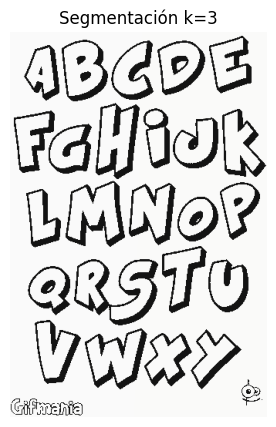


üîπ Ejecutando clustering con k = 5
‚û°Ô∏è  M√©todo: cuML (GPU) | Inercia: 170790.98 | Silueta: 0.3372 | Tiempo: 0.08s


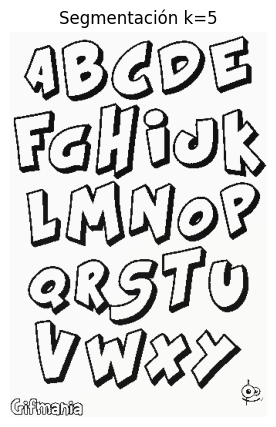


üîπ Ejecutando clustering con k = 7
‚û°Ô∏è  M√©todo: cuML (GPU) | Inercia: 153390.02 | Silueta: 0.3681 | Tiempo: 0.07s


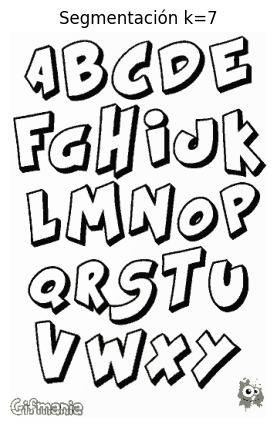


üîπ Ejecutando clustering con k = 9
‚û°Ô∏è  M√©todo: cuML (GPU) | Inercia: 102682.30 | Silueta: 0.3659 | Tiempo: 0.12s


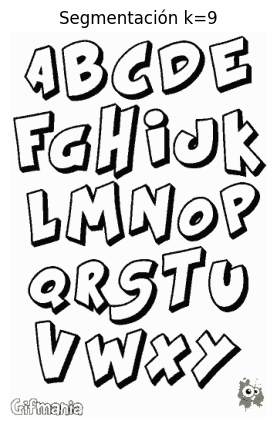

In [106]:
# =============================================================================
# CELDA 4: Clustering con RGB + coordenadas
# =============================================================================

KS = [3, 5, 7, 9]
resultados = []

for k in KS:
    print(f"\nüîπ Ejecutando clustering con k = {k}")
    # Convert X_scaled to CuPy array if using rapids
    X_input = cp.asarray(X_scaled) if use_rapids else X_scaled
    labels, inertia, tiempo, metodo = run_kmeans(X_input, k, use_rapids=use_rapids)

    # Calcular silueta
    sil = calcular_silueta(X_scaled, labels)
    print(f"‚û°Ô∏è  M√©todo: {metodo} | Inercia: {inertia:.2f} | Silueta: {sil:.4f} | Tiempo: {tiempo:.2f}s")

    resultados.append({"k": k, "inercia": inertia, "silueta": sil, "metodo": metodo})

    # Crear imagen segmentada (colorear cada cluster con color medio)
    cluster_colors = np.zeros((k, 3))
    for i in range(k):
        cluster_colors[i] = pixels[labels == i].mean(axis=0)
    seg_img = cluster_colors[labels].reshape(H, W, 3)
    plt.figure(figsize=(5, 5))
    plt.imshow(seg_img)
    plt.title(f"Segmentaci√≥n k={k}")
    plt.axis("off")
    plt.show()

#CELDA 5 ‚Äî Mostrar resultados del punto 1

In [107]:
# =============================================================================
# CELDA 5: Tabla resumen de inercia y silueta
# =============================================================================

import pandas as pd

df_resultados = pd.DataFrame(resultados)
print("üìä Resultados (RGB + coordenadas):")
display(df_resultados)


üìä Resultados (RGB + coordenadas):


k        inercia   silueta      metodo
0  3  254440.781250  0.387383  cuML (GPU)
1  5  170790.984375  0.337157  cuML (GPU)
2  7  153390.015625  0.368140  cuML (GPU)
3  9  102682.304688  0.365883  cuML (GPU)

##CELDA 6 ‚Äî Reducci√≥n de dimensi√≥n con PCA y UMAP (punto 2)

Aqu√≠ se proyectan los datos a 2D antes del clustering.

In [108]:
# =============================================================================
# CELDA 6: Reducci√≥n de dimensi√≥n con PCA y UMAP
# =============================================================================

# PCA 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("‚úÖ PCA 2D aplicado. Varianza explicada:", pca.explained_variance_ratio_.sum())

# Intentamos usar UMAP si est√° disponible
try:
    import umap
    reducer = umap.UMAP(n_components=2, random_state=42)
    X_umap = reducer.fit_transform(X_scaled)
    use_umap = True
    print("‚úÖ UMAP 2D aplicado.")
except:
    use_umap = False
    print("‚ö†Ô∏è UMAP no disponible. Solo se usar√° PCA.")


‚úÖ PCA 2D aplicado. Varianza explicada: 0.79891187


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


‚úÖ UMAP 2D aplicado.


##CELDA 7 ‚Äî Clustering sobre PCA y UMAP

In [109]:
# =============================================================================
# CELDA 7: Clustering sobre proyecciones (PCA y UMAP)
# =============================================================================

resultados_pca = []
resultados_umap = []

for k in KS:
    print(f"\nüî∏ PCA: ejecutando k = {k}")
    labels_pca, inertia_pca, tiempo_pca, metodo_pca = run_kmeans(X_pca, k, use_rapids)
    sil_pca = calcular_silueta(X_pca, labels_pca)
    resultados_pca.append({"k": k, "inercia": inertia_pca, "silueta": sil_pca})
    print(f"PCA k={k} -> Inercia={inertia_pca:.2f}, Silueta={sil_pca:.4f}")

if use_umap:
    for k in KS:
        print(f"\nüî∏ UMAP: ejecutando k = {k}")
        labels_umap, inertia_umap, tiempo_umap, metodo_umap = run_kmeans(X_umap, k, use_rapids)
        sil_umap = calcular_silueta(X_umap, labels_umap)
        resultados_umap.append({"k": k, "inercia": inertia_umap, "silueta": sil_umap})
        print(f"UMAP k={k} -> Inercia={inertia_umap:.2f}, Silueta={sil_umap:.4f}")



üî∏ PCA: ejecutando k = 3
PCA k=3 -> Inercia=88365.66, Silueta=0.5987

üî∏ PCA: ejecutando k = 5
PCA k=5 -> Inercia=56661.23, Silueta=0.5767

üî∏ PCA: ejecutando k = 7
PCA k=7 -> Inercia=48695.70, Silueta=0.5545

üî∏ PCA: ejecutando k = 9
PCA k=9 -> Inercia=28243.31, Silueta=0.5226

üî∏ UMAP: ejecutando k = 3
UMAP k=3 -> Inercia=8078154.50, Silueta=0.3662

üî∏ UMAP: ejecutando k = 5
UMAP k=5 -> Inercia=4740440.50, Silueta=0.3356

üî∏ UMAP: ejecutando k = 7
UMAP k=7 -> Inercia=3236933.50, Silueta=0.3611

üî∏ UMAP: ejecutando k = 9
UMAP k=9 -> Inercia=2518293.25, Silueta=0.3571


##CELDA 8 ‚Äî Comparar resultados finales

In [110]:
# =============================================================================
# CELDA 8: Comparar resultados (RGB, PCA, UMAP)
# =============================================================================

df_rgb = pd.DataFrame(resultados).assign(Metodo="RGB + coords")
df_pca = pd.DataFrame(resultados_pca).assign(Metodo="PCA 2D")
if use_umap:
    df_umap = pd.DataFrame(resultados_umap).assign(Metodo="UMAP 2D")
    df_total = pd.concat([df_rgb, df_pca, df_umap])
else:
    df_total = pd.concat([df_rgb, df_pca])

print("üìà Comparaci√≥n general de segmentaciones:")
display(df_total)


üìà Comparaci√≥n general de segmentaciones:


k       inercia   silueta      metodo        Metodo
0  3  2.544408e+05  0.387383  cuML (GPU)  RGB + coords
1  5  1.707910e+05  0.337157  cuML (GPU)  RGB + coords
2  7  1.533900e+05  0.368140  cuML (GPU)  RGB + coords
3  9  1.026823e+05  0.365883  cuML (GPU)  RGB + coords
0  3  8.836566e+04  0.598710         NaN        PCA 2D
1  5  5.666123e+04  0.576729         NaN        PCA 2D
2  7  4.869570e+04  0.554512         NaN        PCA 2D
3  9  2.824331e+04  0.522634         NaN        PCA 2D
0  3  8.078154e+06  0.366155         NaN       UMAP 2D
1  5  4.740440e+06  0.335571         NaN       UMAP 2D
2  7  3.236934e+06  0.361123         NaN       UMAP 2D
3  9  2.518293e+06  0.357118         NaN       UMAP 2D

#**Punto 2**
**Importar liberias**

In [111]:
# ============================================
# Punto 2: Segmentaci√≥n con PCA y UMAP
# ============================================

# Librer√≠as base
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from cuml.cluster import KMeans as cuKMeans
from cuml.manifold import UMAP

plt.style.use('seaborn-v0_8')


**2. Preparar los datos**

In [112]:
# Supongamos que ya tienes la imagen cargada como 'img' y los datos combinados con posici√≥n
# Si no, ejecuta esta celda:

h, w, c = img.shape

# Crear coordenadas (x, y)
X, Y = np.meshgrid(np.arange(w), np.arange(h))

# Vectorizar todos los p√≠xeles: color + posici√≥n
data = np.column_stack([img.reshape(-1, 3), X.reshape(-1, 1), Y.reshape(-1, 1)])

print("Forma del conjunto de datos original:", data.shape)


Forma del conjunto de datos original: (166500, 5)


**3 ‚Äî Aplicar PCA a 2 dimensiones**

In [113]:
# Reducimos de 5D (R, G, B, x, y) ‚Üí 2D con PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

print("Datos reducidos con PCA:", data_pca.shape)


Datos reducidos con PCA: (166500, 2)


**4. Aplicar UMAP a 2 dimensiones**

In [114]:
# Reducimos de 5D ‚Üí 2D con UMAP
umap = UMAP(n_components=2, random_state=42)
data_umap = umap.fit_transform(data)

print("Datos reducidos con UMAP:", data_umap.shape)


[2025-10-28 22:16:58.414] [CUML] [info] build_algo set to brute_force_knn because random_state is given
Datos reducidos con UMAP: (166500, 2)


**5. Clustering y m√©tricas para PCA**

In [115]:
k_values = [3, 5, 7, 9]
inertia_pca = []
silhouette_pca = []

for k in k_values:
    kmeans_pca = cuKMeans(n_clusters=k, random_state=42)
    labels_pca = kmeans_pca.fit_predict(data_pca)

    inertia_pca.append(kmeans_pca.inertia_)
    silhouette_pca.append(silhouette_score(data_pca, labels_pca))

# Mostrar resultados
for i, k in enumerate(k_values):
    print(f"PCA - k={k}: Inercia={inertia_pca[i]:.2f}, Silueta={silhouette_pca[i]:.4f}")


PCA - k=3: Inercia=1488926358.28, Silueta=0.5956
PCA - k=5: Inercia=998567539.83, Silueta=0.5697
PCA - k=7: Inercia=533197375.55, Silueta=0.5621
PCA - k=9: Inercia=338728945.66, Silueta=0.5352


**6. Clustering y m√©tricas para UMAP**

In [116]:
inertia_umap = []
silhouette_umap = []

for k in k_values:
    kmeans_umap = cuKMeans(n_clusters=k, random_state=42)
    labels_umap = kmeans_umap.fit_predict(data_umap)

    inertia_umap.append(kmeans_umap.inertia_)
    silhouette_umap.append(silhouette_score(data_umap, labels_umap))

# Mostrar resultados
for i, k in enumerate(k_values):
    print(f"UMAP - k={k}: Inercia={inertia_umap[i]:.2f}, Silueta={silhouette_umap[i]:.4f}")


UMAP - k=3: Inercia=5070906.00, Silueta=0.3810
UMAP - k=5: Inercia=3180240.50, Silueta=0.3383
UMAP - k=7: Inercia=2175344.00, Silueta=0.3587
UMAP - k=9: Inercia=1750554.12, Silueta=0.3423


**7. Visualizaci√≥n de las segmentaciones**

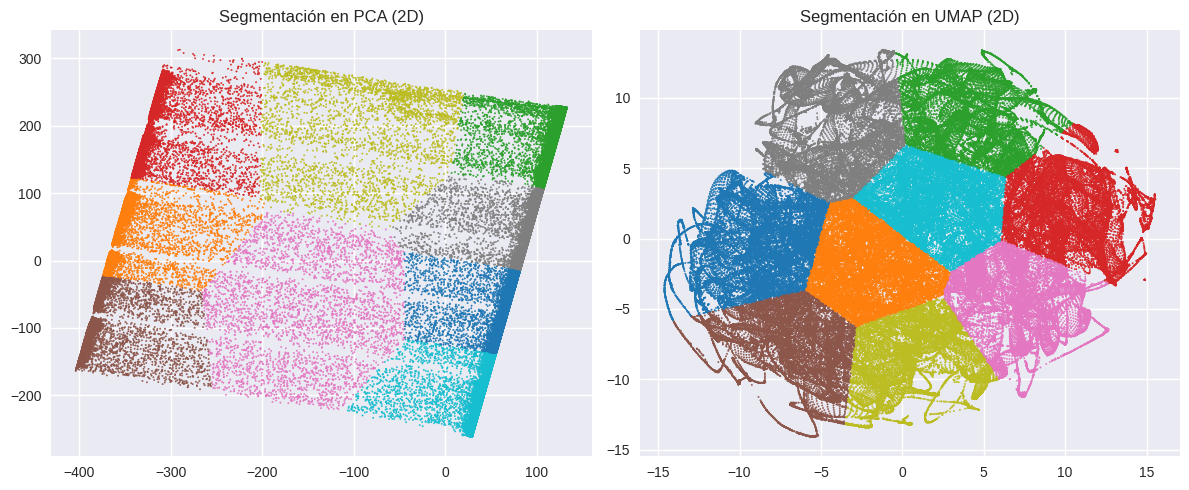

In [117]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(data_pca[:, 0], data_pca[:, 1], c=labels_pca, cmap='tab10', s=1)
axs[0].set_title("Segmentaci√≥n en PCA (2D)")

axs[1].scatter(data_umap[:, 0], data_umap[:, 1], c=labels_umap, cmap='tab10', s=1)
axs[1].set_title("Segmentaci√≥n en UMAP (2D)")

plt.tight_layout()
plt.show()


**8. Comparar m√©tricas gr√°ficamente**

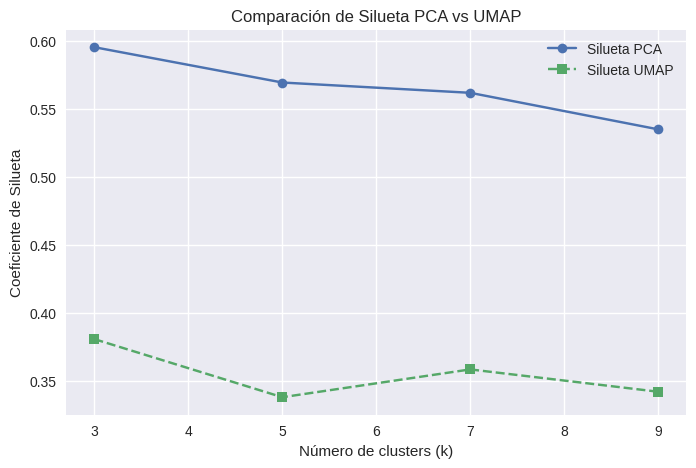

In [118]:
plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_pca, 'o-', label='Silueta PCA')
plt.plot(k_values, silhouette_umap, 's--', label='Silueta UMAP')
plt.xlabel("N√∫mero de clusters (k)")
plt.ylabel("Coeficiente de Silueta")
plt.title("Comparaci√≥n de Silueta PCA vs UMAP")
plt.legend()
plt.grid(True)
plt.show()
